In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [37]:
pdata=pd.read_csv("../Datasets/StudentsPerformance.csv")
pdata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [38]:
pdata.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [39]:
pdata.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [40]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [41]:
pdata.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [42]:
score=pdata[['writing score','reading score','math score']]
pdata['Total Score']=score.sum(axis=1)
# pdata1.drop('Total score',inplace=True)
pdata
# Axis = 1 is mandatory as it is columns wise operation other wise it will choose the row by default

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


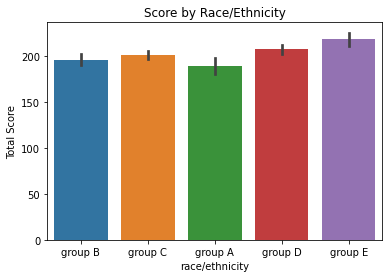

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(x='race/ethnicity',y='Total Score',data=pdata)
plt.title('Score by Race/Ethnicity')
plt.show()

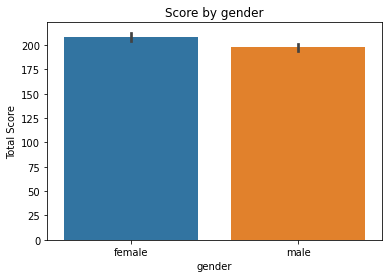

In [44]:
plt.figure(figsize=(6,4))
sns.barplot(x='gender',y='Total Score',data=pdata)
plt.title('Score by gender')
plt.show()

In [24]:
# The Gender is also playing a major role in deciding the score so it can't be ignore

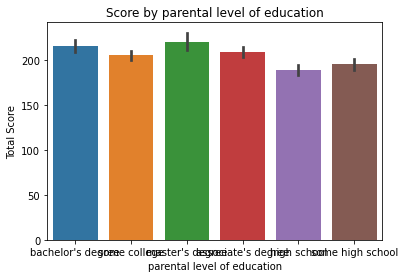

In [45]:
plt.figure(figsize=(6,4))
sns.barplot(x='parental level of education',y='Total Score',data=pdata)
plt.title('Score by parental level of education')
plt.show()

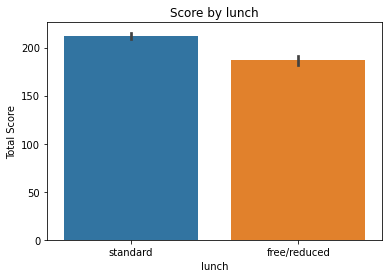

In [46]:
plt.figure(figsize=(6,4))
sns.barplot(x='lunch',y='Total Score',data=pdata)
plt.title('Score by lunch')
plt.show()

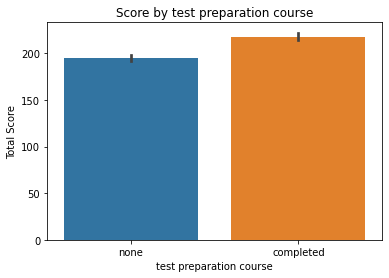

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(x='test preparation course',y='Total Score',data=pdata)
plt.title('Score by test preparation course')
plt.show()

In [47]:
pdata['Total Score'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: Total Score, dtype: float64

# Encoding Nominal Variable

In [30]:
# Male female has the equal weightage

In [48]:
gen=pd.get_dummies(pdata['gender'])
gen

,female,male
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,1,0
998,1,0


In [52]:
pdata1=pd.concat([pdata,gen],axis=1)
pdata1.drop(['gender','female'],inplace=True,axis=1)
pdata1.head(20)

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,male
0,group B,bachelor's degree,standard,none,72,72,74,218,0
1,group C,some college,standard,completed,69,90,88,247,0
2,group B,master's degree,standard,none,90,95,93,278,0
3,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,group C,some college,standard,none,76,78,75,229,1
5,group B,associate's degree,standard,none,71,83,78,232,0
6,group B,some college,standard,completed,88,95,92,275,0
7,group B,some college,free/reduced,none,40,43,39,122,1
8,group D,high school,free/reduced,completed,64,64,67,195,1
9,group B,high school,free/reduced,none,38,60,50,148,0


In [59]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',sparse=False)

In [60]:
gen2=ohe.fit_transform(pdata[['gender']])
ohe.categories_

[array(['female', 'male'], dtype=object)]

In [61]:
gen2

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [62]:
# Encoding Ordinal Value

In [66]:
print(pdata['parental level of education'].unique().tolist())

["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']


In [82]:
c=['some high school','high school','some college', "associate's degree","bachelor's degree","master's degree"]
c

['some high school',
 'high school',
 'some college',
 "associate's degree",
 "bachelor's degree",
 "master's degree"]

In [83]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[c])

In [84]:
edu=oe.fit_transform(pdata[['parental level of education']])
oe.categories_

[array(['some high school', 'high school', 'some college',
        "associate's degree", "bachelor's degree", "master's degree"],
       dtype=object)]

In [85]:
edu[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [86]:
pdata['parental level of education'].head()

0     bachelor's degree
1          some college
2       master's degree
3    associate's degree
4          some college
Name: parental level of education, dtype: object

In [117]:
from sklearn.compose import ColumnTransformer
# ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['gender','race/ethnicity','lunch','test preparation']),
#                      ('oe',OrdinalEncoder(categories=[c]),['parental level of education'])],remainder='passthrough')
# ct=ColumnTransformer([('ohe',OneHotEncoder,['gender','race/ethnicity','lunch','test preparation']),
#                      ('oe',OrdinalEncoder(categories=[c]),['parental level of education'])],remainder='passthrough')
ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['gender','race/ethnicity','lunch','test preparation course']),
                     ('oe',OrdinalEncoder(categories=[c]),['parental level of education'])],remainder='passthrough')
# remainder means remaining would'nt be affected by this :
# ohe is apllied to Nominal data 
# whereas oe is applied to ordinal data

In [118]:
pdata

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [119]:
pdata1

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,male
0,group B,bachelor's degree,standard,none,72,72,74,218,0
1,group C,some college,standard,completed,69,90,88,247,0
2,group B,master's degree,standard,none,90,95,93,278,0
3,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,group C,some college,standard,none,76,78,75,229,1
...,...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,completed,88,99,95,282,0
996,group C,high school,free/reduced,none,62,55,55,172,1
997,group C,high school,free/reduced,completed,59,71,65,195,0
998,group D,some college,standard,completed,68,78,77,223,0


In [120]:
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(drop='first'),
                                 ['gender', 'race/ethnicity', 'lunch',
                                  'test preparation course']),
                                ('oe',
                                 OrdinalEncoder(categories=[['some high school',
                                                             'high school',
                                                             'some college',
                                                             "associate's "
                                                             'degree',
                                                             "bachelor's "
                                                             'degree',
                                                             "master's "
                                                             'degree']]),
                                 ['parent

In [127]:
pdata3=ct.fit_transform(pdata)
pdata3

array([[  0.,   1.,   0., ...,  72.,  74., 218.],
       [  0.,   0.,   1., ...,  90.,  88., 247.],
       [  0.,   1.,   0., ...,  95.,  93., 278.],
       ...,
       [  0.,   0.,   1., ...,  71.,  65., 195.],
       [  0.,   0.,   0., ...,  78.,  77., 223.],
       [  0.,   0.,   0., ...,  86.,  86., 249.]])

In [129]:
pdata.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


AttributeError: 'numpy.ndarray' object has no attribute 'head'